## Chapter 4

#### topic 4.1 == you will learn how to get data from the web, 
whether it is stored in files or in HTML. 
You'll also learn the basics of scraping and parsing web data.

In [ ]:
from urllib.request import urlretrieve

import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

urlretrieve(url, 'wine_quality.csv')

winequality= pd.read_csv('wine_quality.csv', sep=';')

print(winequality.head())

In [ ]:
from urllib.request import urlopen, Request

url = "http://www.datacamp.com/teach/documentation"

request = Request(url)

response = urlopen(request)
print(type(response))
print(response)
response.close()



In [ ]:
# reading HTML from a page

from urllib.request import urlopen, Request

url = "http://www.datacamp.com/teach/documentation"

request = Request(url)

response = urlopen(request)
html= response.read()

print(html)

In [10]:
import requests

url = 'http://www.datacamp.com/teach/documentation'
read= requests.get(url)
text = read.text

print(text)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>

<title>Attention Required! | Cloudflare</title>

<meta name="captcha-bypass" id="captcha-bypass" />
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'" http-equiv="Content-Security-Policy"/>
  <title>
   Site not found · GitHub Pages
  </title>
  <style media="screen" type="text/css">
   body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { display: ta
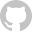
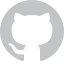

In [11]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'

req = requests.get(url)

html_doc = req.text

soup = BeautifulSoup(html_doc)

pretty_soup = soup.prettify()

print(pretty_soup)

In [14]:
#scrapping individual elements from web
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'

req = requests.get(url)
html_doc = req.text
soup = BeautifulSoup(html_doc)

title_tag = soup.title

print(title_tag)

title_text = soup.title.text

print(title_text)

<title>Site not found · GitHub Pages</title>
Site not found · GitHub Pages


In [15]:

import requests
from bs4 import BeautifulSoup
url = 'https://www.python.org/~guido/'

req = requests.get(url)
html_doc = req.text
soup = BeautifulSoup(html_doc)

a_tag = soup.find_all('a')

# print(a_tag)

for link in a_tag:
    print(link.get('href'))

https://help.github.com/pages/
https://githubstatus.com
https://twitter.com/githubstatus
/
/


## # Chapter 4

### topic 4.2 == You will learn the basics of extracting data from APIs, 
#### gain insight on the importance of APIs,

In [26]:
import pandas as pd
import json as js

In [27]:
# opening json file
with open('a_movie.json') as js_file:
    js_data = js.load(js_file)

    
#reading data and printing data
for k in js_data.keys():
    print(k + " : " , js_data[k])

Title :  The Social Network
Year :  2010
Rated :  PG-13
Released :  01 Oct 2010
Runtime :  120 min
Genre :  Biography, Drama
Director :  David Fincher
Writer :  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors :  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot :  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language :  English, French
Country :  USA
Awards :  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster :  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings :  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore :  95
imdbRating :  7.7
imdbVotes :  571,335
imdbID :  tt128501

In [28]:
#making dataframe from json data

# taking keys as column of dataframe
columnList = js_data.keys()

# taking values as values of columns
dataList = js_data.values()

#making data frame
js_df = pd.DataFrame(js_data.values())


#taking transpose of dataframe so that they becomes the column
js_df = js_df.T

#adding columns
js_df.columns = columnList

In [29]:
# checking columns
print(js_df.columns)

# we found that data in Ratings column is needed to be cleaned.
print(js_df.Ratings)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response'],
      dtype='object')
0    [{'Source': 'Internet Movie Database', 'Value'...
Name: Ratings, dtype: object


In [30]:
# now we are separating the data in Rating column and we are dividing the column into multiple columns
# 1. Understanding the data in Ratings column
# 2. Separating the data in Rating columns

n=0
tot_len = len(js_df.Ratings[0])
while n < tot_len:
    for k,v in js_df.Ratings.items():
        vals = list(v[n].values())
#         print(vals)
        column_name = "Rating" + str(n+1) + "_Source"
        js_df[column_name] = vals[0]
        column_name = "Rating" + str(n+1) + "_Values"
        js_df[column_name] = vals[1]
    n+=1

In [32]:
# printing the dataframe
js_df


# dropping the Rating column now.
js_df.drop(columns='Ratings', inplace = True)


In [33]:
js_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,BoxOffice,Production,Website,Response,Rating1_Source,Rating1_Values,Rating2_Source,Rating2_Values,Rating3_Source,Rating3_Values
0,The Social Network,2010,PG-13,01 Oct 2010,120 min,"Biography, Drama",David Fincher,"Aaron Sorkin (screenplay), Ben Mezrich (book)","Jesse Eisenberg, Rooney Mara, Bryan Barter, Du...",Harvard student Mark Zuckerberg creates the so...,...,"$96,400,000",Columbia Pictures,http://www.thesocialnetwork-movie.com/,True,Internet Movie Database,7.7/10,Rotten Tomatoes,95%,Metacritic,95/100


### Fetching JSON data from a link

In [35]:
#importing requests
import requests
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# get the url and data on text on url
req = requests.get(url)
print(req.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 168 wins & 186 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"630,681","imdbID":"tt1285

In [39]:
# separating JSON data from text
json_data = req.json()

# printing JSON data
for k in json_data.keys():
    print(k + ": " , json_data[k])
    
    
#Now again we have problem in Rating data. so we can clean it according to above method

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 168 wins & 186 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  630,681
imdbID:  tt1285016
Type:  movie
DVD:  05

In [8]:
import requests

# This link contains information about Pizza
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

req = requests.get(url)

json_data = req.json()

# picking exact data about Pizza.
pizza_extract = json_data['query']['pages']['24768']['extract']

print(pizza_extract)



<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 1

## Working on Twitter Scrapping Tweepy

In [16]:
# Firstly you need to Install tweepy package by running this command, pip install tweepy
import tweepy
import json

#stroing access information
#To get these following information go to developer.twitter.com and login with your information.
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

#pass OAuth details to tweepy's OAuth Handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [26]:
# String of path to file: tweets_data_path
tweets_data_path = 'tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


In [27]:
# Now converting this data to Pandas
import pandas as pd

df = pd.DataFrame(tweets_data, columns=['text','lang'])

df.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en
